In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import scipy

In [ ]:
def bernoulli(p):
    uniform = np.random.uniform(0, 1)
    if uniform <= p:
        return 1
    else:
        return 0

In [ ]:
def binomial_inversao_recursiva(n, p):
    unif = np.random.uniform()
    i = 0
    pi = (1-p) ** n
    F = pi
    while unif > F:
        pi = ((n - i) / (i + 1)) * p / (1-p) * pi
        i += 1
        F = F + pi
    return i

## Poisson

In [ ]:
def poisson_recursivo(lam):
    unif = np.random.uniform(0, 1)
    i = 0
    pi = np.exp(-lam)
    F = pi
    while unif>F:
        i = i + 1
        pi = (lam / i) * pi
        F = F + pi
    return i

(array([  26.,  261.,  950., 2446., 2757., 2299.,  989.,  225.,   42.,
           5.]),
 array([ 66. ,  73.6,  81.2,  88.8,  96.4, 104. , 111.6, 119.2, 126.8,
        134.4, 142. ]),
 <BarContainer object of 10 artists>)

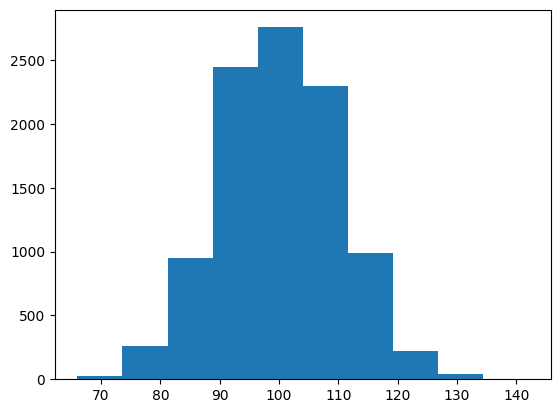

In [ ]:
poisson_trials = [poisson_recursivo(100) for i in range(10000)]
plt.hist(poisson_trials)

(array([  7.,  64., 164., 237., 242., 177.,  62.,  30.,  16.,   1.]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <BarContainer object of 10 artists>)

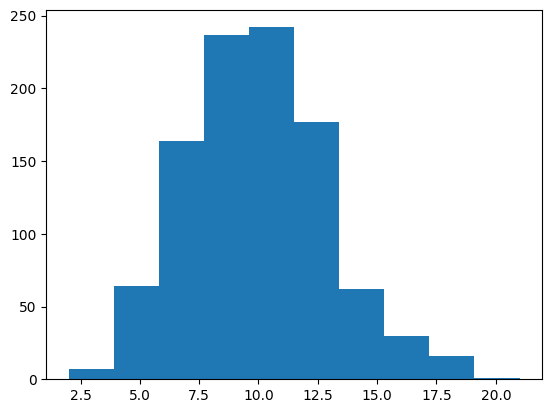

In [ ]:
poisson_trials = [poisson_recursivo(10) for i in range(1000)]
binomial_trials = [binomial_inversao_recursiva(1000, 0.01) for i in range(1000)]
plt.hist(poisson_trials)

(array([ 10.,  57., 152., 239., 252., 151.,  96.,  33.,   8.,   2.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 <BarContainer object of 10 artists>)

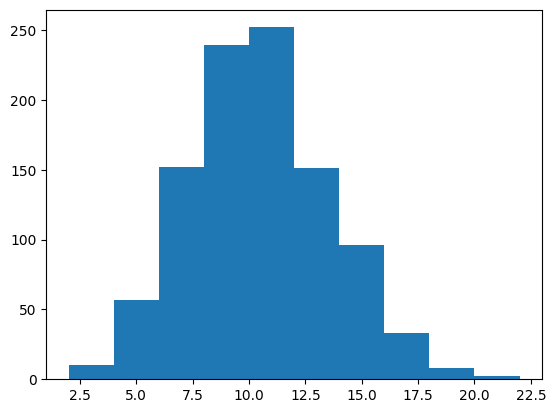

In [ ]:
plt.hist(binomial_trials)

## Geométrica

In [ ]:
def geometrica_ingenua(p, timer=False):
    start = time.time()
    i = 1
    while bernoulli(p) != 1:
        i += 1
    end = time.time()
    if timer:
        return i, end-start
    return i

In [ ]:
def geometrica_inversao(p, timer=False):
    start = time.time()
    unif = np.random.uniform(0, 1)
    x = math.floor(np.log(unif)/np.log(1-p)) + 1
    end = time.time()
    if timer:
        return x, end-start
    return x

In [ ]:
tempo = 0
for i in range(100):
    x, t = geometrica_ingenua(0.01, True)
    tempo += t
print(tempo)

0.06596946716308594


In [ ]:
tempo = 0
for i in range(100):
    x, t = geometrica_inversao(0.01, True)
    tempo += t
print(tempo)

0.0009913444519042969


(array([6.549e+03, 2.275e+03, 5.800e+02, 4.080e+02, 1.000e+02, 6.100e+01,
        1.500e+01, 5.000e+00, 5.000e+00, 2.000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

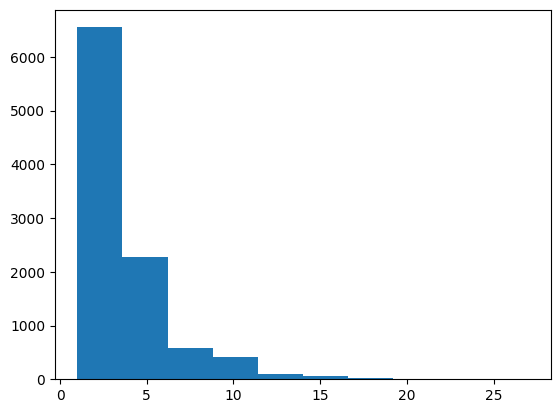

In [ ]:
geometrica_ingenua_trials = [geometrica_ingenua(0.3) for i in range(10000)]
plt.hist(geometrica_ingenua_trials)

(array([6.568e+03, 2.254e+03, 5.850e+02, 3.980e+02, 1.020e+02, 6.700e+01,
        2.000e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

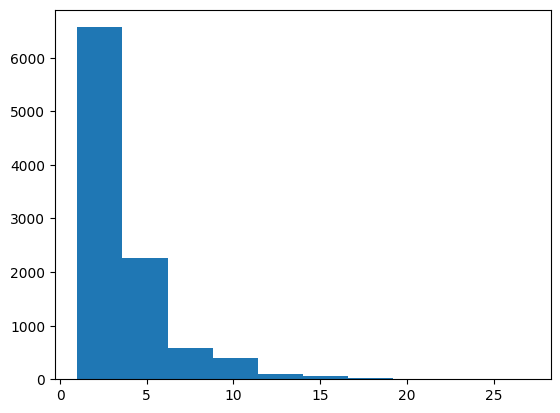

In [ ]:
geometrica_inversao_trials = [geometrica_inversao(0.3) for i in range(10000)]
plt.hist(geometrica_inversao_trials)

(array([6.602e+03, 2.225e+03, 7.520e+02, 2.410e+02, 1.160e+02, 4.800e+01,
        1.100e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

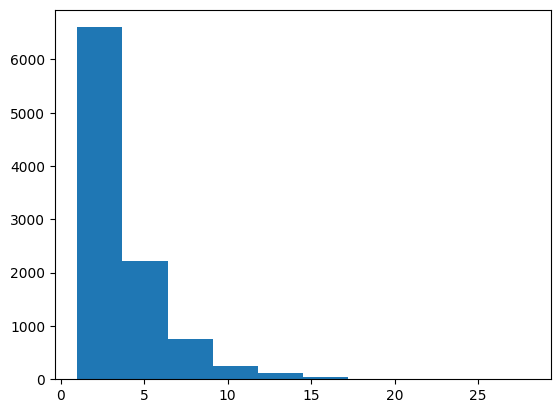

In [ ]:
geometrica_numpy_trials = [np.random.geometric(0.3) for i in range(10000)]
plt.hist(geometrica_numpy_trials)

In [ ]:
tempo = 0
for i in range(1000):
    x, t = geometrica_ingenua(0.1, True)
    tempo += t
print(f"Tempo da geometrica ingenua com p = 0.1 foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = geometrica_ingenua(0.9, True)
    tempo += t
print(f"Tempo da geometrica ingenua com p = 0.9 foi: {tempo}")

Tempo da geometrica ingenua com p = 0.1 foi: 0.2003343105316162
Tempo da geometrica ingenua com p = 0.9 foi: 0.01659703254699707


In [ ]:
tempo = 0
for i in range(1000):
    x, t = geometrica_inversao(0.1, True)
    tempo += t
print(f"Tempo da geometrica por inversao com p = 0.1 foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = geometrica_inversao(0.9, True)
    tempo += t
print(f"Tempo da geometrica por inversao com p = 0.9 foi: {tempo}")

Tempo da geometrica por inversao com p = 0.1 foi: 0.022669315338134766
Tempo da geometrica por inversao com p = 0.9 foi: 0.009824275970458984


O método ingênuo se torna muito mais lento conforme p se aproxima de 0, pois o número de ensaios necessários para atingir um sucesso aumenta. Já o método por inversão não sofre deste problema, e mantém sua performance com p pequeno.

## Binomial Negativa

In [ ]:
def binomial_negativa_bernoullis(r, p, timer=False):
    start = time.time()
    n_ensaios = 0
    sucessos = 0
    while sucessos < r:
        n_ensaios += 1
        sucessos += bernoulli(p)
    end = time.time()
    if timer:
        return n_ensaios, end-start
    return n_ensaios

In [ ]:
def binomial_negativa_geometricas(r, p, timer=False):
    start = time.time()
    n_ensaios = 0
    for i in range(r):
        n_ensaios += geometrica_inversao(p)
    end = time.time()
    if timer:
        return n_ensaios, end-start
    return n_ensaios

In [ ]:
def binomial_negativa_inversao(r, p, timer=False):
    start = time.time()
    unif = np.random.uniform()
    n = r
    pn = p ** r
    F = pn
    while unif > F:
        pn = pn * (1-p) * n / (n-r+1)
        n = n+1
        F = F+pn
    end = time.time()
    if timer:
        return n, end-start
    return n

In [ ]:
r = 5
p = 0.3

(array([ 935., 3212., 3091., 1642.,  640.,  333.,  107.,   25.,    9.,
           6.]),
 array([ 5. ,  9.8, 14.6, 19.4, 24.2, 29. , 33.8, 38.6, 43.4, 48.2, 53. ]),
 <BarContainer object of 10 artists>)

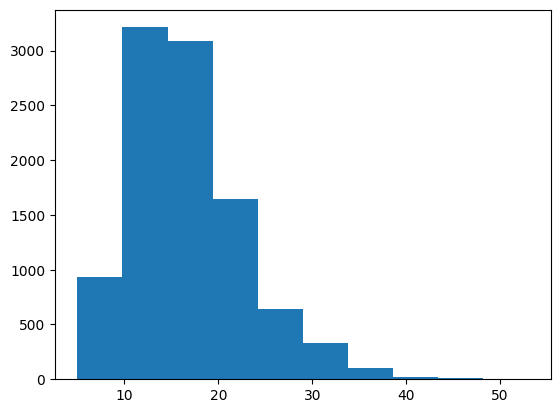

In [ ]:
binomial_negativa_bernoullis_trials = [binomial_negativa_bernoullis(r, p) for i in range(10000)]
plt.hist(binomial_negativa_bernoullis_trials)

(array([ 964., 2521., 3181., 1689., 1050.,  357.,  173.,   44.,   16.,
           5.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

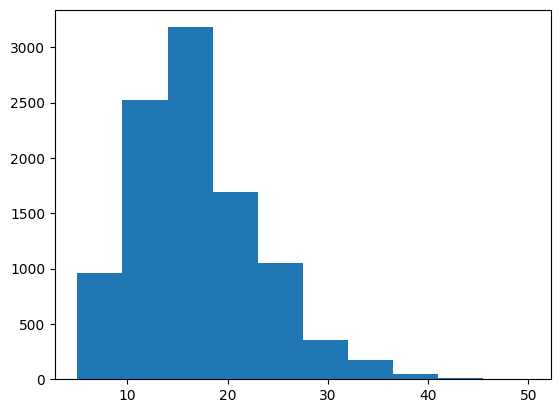

In [ ]:
binomial_negativa_geometricas_trials = [binomial_negativa_geometricas(r, p) for i in range(10000)]
plt.hist(binomial_negativa_geometricas_trials)

(array([ 979., 3210., 2552., 1928.,  734.,  413.,  136.,   29.,   12.,
           7.]),
 array([ 5. ,  9.6, 14.2, 18.8, 23.4, 28. , 32.6, 37.2, 41.8, 46.4, 51. ]),
 <BarContainer object of 10 artists>)

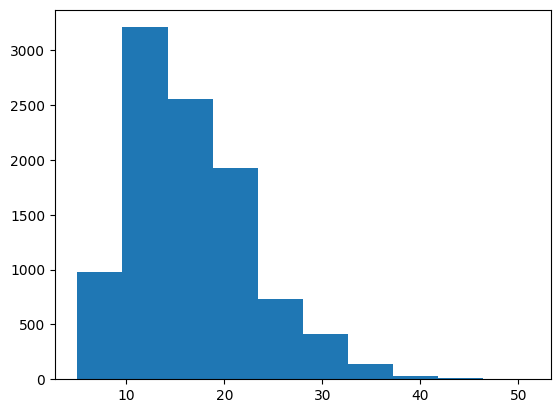

In [ ]:
binomial_negativa_inversao_trials = [binomial_negativa_inversao(r, p) for i in range(10000)]
plt.hist(binomial_negativa_inversao_trials)

(array([1007., 2454., 2666., 1891., 1071.,  587.,  193.,   90.,   28.,
          13.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <BarContainer object of 10 artists>)

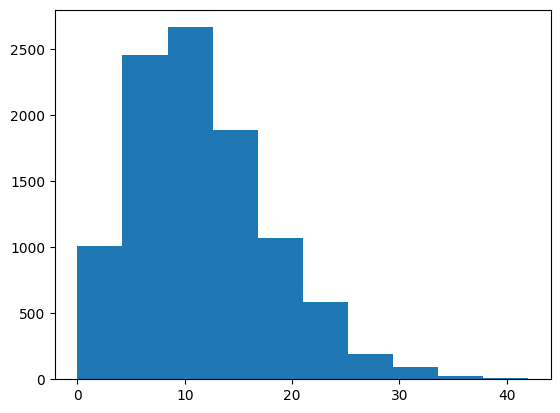

In [ ]:
binomial_negativa_numpy_trials = [np.random.negative_binomial(r, p) for i in range(10000)]
plt.hist(binomial_negativa_numpy_trials)

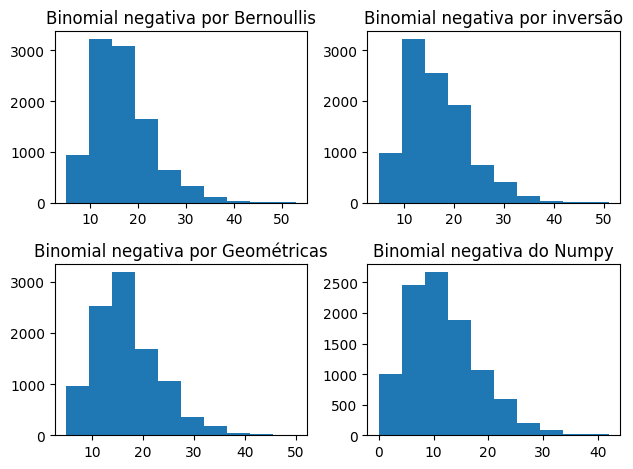

In [ ]:
negative_binomial_graph, axs = plt.subplots(2, 2)
axs[0, 0].hist(binomial_negativa_bernoullis_trials)
axs[0, 0].set_title("Binomial negativa por Bernoullis")
axs[1, 0].hist(binomial_negativa_geometricas_trials)
axs[1, 0].set_title("Binomial negativa por Geométricas")
axs[0, 1].hist(binomial_negativa_inversao_trials)
axs[0, 1].set_title("Binomial negativa por inversão")
axs[1, 1].hist(binomial_negativa_numpy_trials)
axs[1, 1].set_title("Binomial negativa do Numpy")
negative_binomial_graph.tight_layout()
negative_binomial_graph.show()

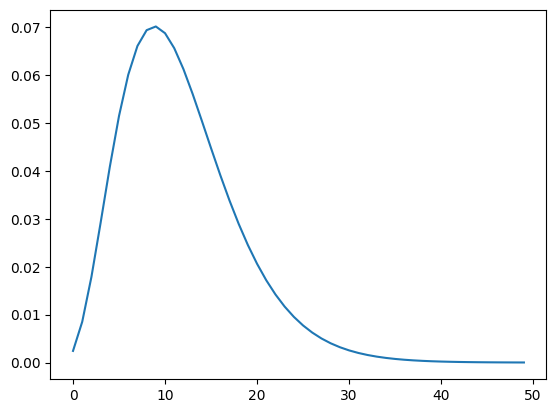

In [ ]:
negative_binomial_pmf = [scipy.stats.nbinom.pmf(k, r, p) for k in range(50)]
plt.plot(negative_binomial_pmf)
plt.show()

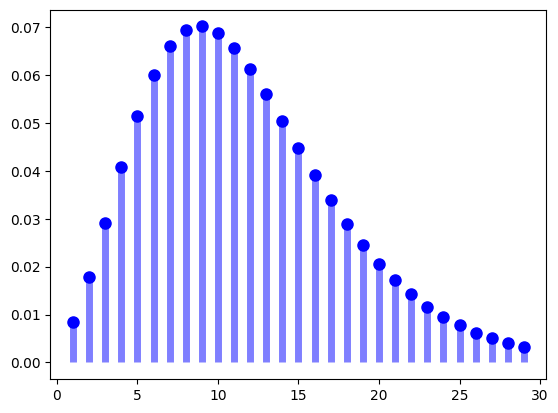

In [ ]:
from scipy.stats import nbinom
fig, ax = plt.subplots(1, 1)
x = np.arange(nbinom.ppf(0.01, r, p),
              nbinom.ppf(0.99, r, p))
ax.plot(x, nbinom.pmf(x, r, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, r, p), colors='b', lw=5, alpha=0.5)
fig.show()

In [ ]:
r = 5
p = 0.1
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 5 e p = 0.1:
Tempo da binomial negativa por bernoullis foi: 0.32654380798339844
Tempo da binomial negativa por geométricas foi: 0.08034396171569824
Tempo da binomial negativa por inversão foi: 0.048151254653930664


In [ ]:
r = 20
p = 0.1
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 20 e p = 0.1:
Tempo da binomial negativa por bernoullis foi: 0.6226415634155273
Tempo da binomial negativa por geométricas foi: 0.1239316463470459
Tempo da binomial negativa por inversão foi: 0.02922344207763672


In [ ]:
r = 5
p = 0.5
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 5 e p = 0.5:
Tempo da binomial negativa por bernoullis foi: 0.027478694915771484
Tempo da binomial negativa por geométricas foi: 0.028564453125
Tempo da binomial negativa por inversão foi: 0.004113197326660156


In [ ]:
r = 20
p = 0.5
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 20 e p = 0.5:
Tempo da binomial negativa por bernoullis foi: 0.11298203468322754
Tempo da binomial negativa por geométricas foi: 0.11022710800170898
Tempo da binomial negativa por inversão foi: 0.006286144256591797


In [ ]:
r = 5
p = 0.9
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 5 e p = 0.9:
Tempo da binomial negativa por bernoullis foi: 0.018054723739624023
Tempo da binomial negativa por geométricas foi: 0.027132034301757812
Tempo da binomial negativa por inversão foi: 0.0029451847076416016


In [ ]:
r = 20
p = 0.9
print(f"Para r = {r} e p = {p}:")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_bernoullis(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por bernoullis foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_geometricas(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por geométricas foi: {tempo}")

tempo = 0
for i in range(1000):
    x, t = binomial_negativa_inversao(r, p, True)
    tempo += t
print(f"Tempo da binomial negativa por inversão foi: {tempo}")

Para r = 20 e p = 0.9:
Tempo da binomial negativa por bernoullis foi: 0.06491327285766602
Tempo da binomial negativa por geométricas foi: 0.1050107479095459
Tempo da binomial negativa por inversão foi: 0.003247976303100586


Percebe-se que valores maiores de r afetam negativamente a performance do método por soma de Bernoullis e por soma de geométricas, ao passo que o método de inversão recursiva é indiferente ao valor de r.
Já em relação a p, valores próximos a 0 afetam negativamente todos os métodos, apesar de que o o método por inversão é sempre o mais rápido. Vale notar também que o método por soma de Bernoullis é o mais afetado, pois com p próximo a 1 ele se mostra ligeiramente (mas de forma consistente) mais rápido do que o método por soma de geométricas, mas com p próximo a 0 ele é consideravelmente mais lento.

## Hipergeométrica

In [ ]:
def my_hypergeo(N, k, n):
    pop = np.zeros(N)
    pop[0:k] = 1

    for i in range(N-1):
        u = np.random.uniform(0, N)
        j = int(u)
        pop[i], pop[j] = pop[j], pop[i]

    x = int(pop[0:n].sum())
    return x

In [ ]:
N = 25
M = 12
n = 12

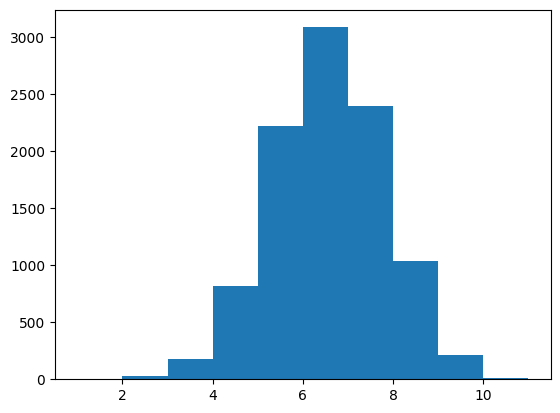

In [ ]:
my_hypergeo_trials = [my_hypergeo(N, M, n) for i in range(10000)]
plt.hist(my_hypergeo_trials)
plt.show()

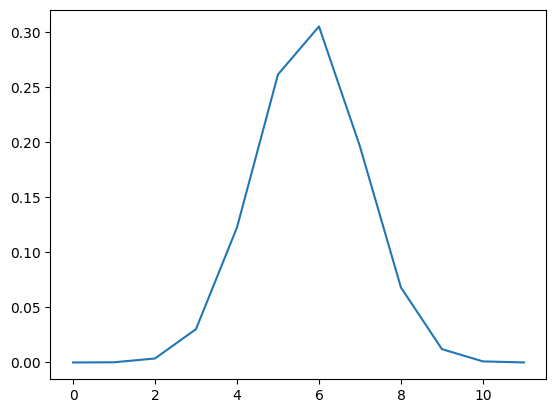

In [ ]:
hypergeo_pmf = [scipy.stats.hypergeom.pmf(x, N, M, n) for x in range(min(M, n))]
plt.plot(hypergeo_pmf)
plt.show()